# Introduction to Seaborn

The definition of seaborn's website is so concise that we replicate it here:

__"Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures."__

That's it! The main benefit of using it is that it is a more high-level library, which means we can achieve sophisticated plots with much less lines of code. Most axes style customization are done automatically. It can automatically provide plots with summary statistics.

In [1]:
import pandas as pd
import seaborn as sns

## Load data

Let's first load a dataframe. The table contains continuous data from two images, identified by the last categorical column `file_name`.

In [2]:
df = pd.read_csv("data/BBBC007_analysis.csv")
df.head()

,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio,file_name
0,139,96.546763,17.504104,10.292770,1.700621,20P1_POS0010_D_1UL
1,360,86.613889,35.746808,14.983124,2.385805,20P1_POS0010_D_1UL
2,43,91.488372,12.967884,4.351573,2.980045,20P1_POS0010_D_1UL
3,140,73.742857,18.940508,10.314404,1.836316,20P1_POS0010_D_1UL
4,144,89.375000,13.639308,13.458532,1.013432,20P1_POS0010_D_1UL


The two images originate from [*The Broad Bioimage Benchmark Collection*](https://bbbc.broadinstitute.org) and show fluroescent microscopy images of Drosophila Kc167 cells.

20P1_POS0007_D_1UL           |  20P1_POS0010_D_1UL
:-------------------------:|:-------------------------:
![image007](../data/BBBC007_20P1_POS0007_D_1UL.png)  |  ![image010](../data/BBBC007_20P1_POS0010_D_1UL.png)

## Relational plots with seaborn

We will apply the seaborn default theme, but you can choose others [here](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme).

In [3]:
sns.set_theme()

Let's start with a scatter plot of `aspect_ratio` vs. `intensity_mean`.

*Note: the scatter plot is the default relational plot in `sns.relplot()`, so that we don't need to provide `kind=scatter`.*

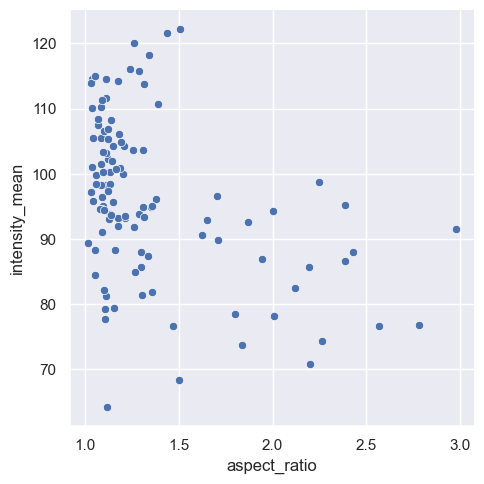

In [4]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean");

We can already embbed and visualize another feature by providing an extra argument: we want the size of the dots to be proportional to the variable `area`.

*Note: Seaborn automatically adds a legend.*

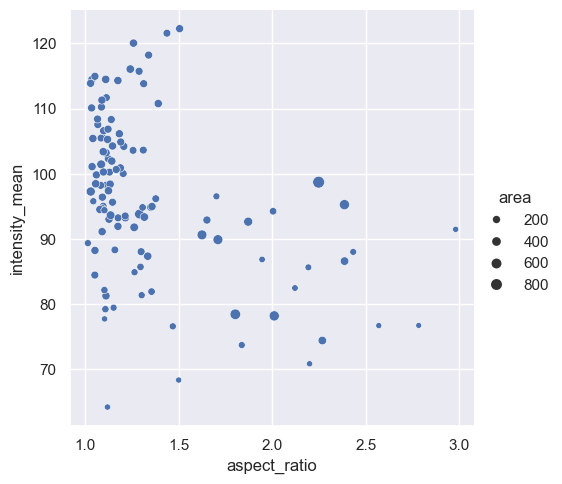

In [5]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean",
            size="area");          # Use the values in "area" to set the dots' size

We can embbed and visualize one more feature by providing another argument. Now the variable `major_axis_length` will be represented by a continuous color gradient.

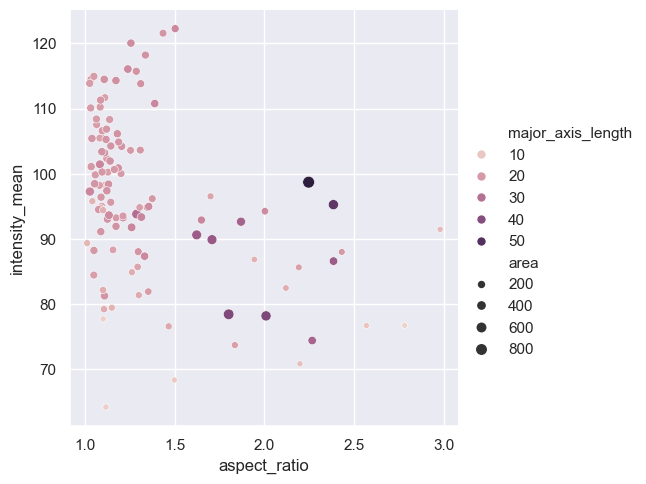

In [6]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean",
            size="area",
            hue="major_axis_length");   # Use the values in "major_axis_length" to set the dots' color

We can even visualize an additional feature by encoding the marker type—using a dot or a triangle—depending on the `file_name` variable. This allows us to represent five variables in a single 2D diagram! However, while it is possible to include this many visual distinctions, the result might not look very clear or aesthetically pleasing.

*Note: the length of the array `markers` should be at least as long as the number of categories in `file_name`.*

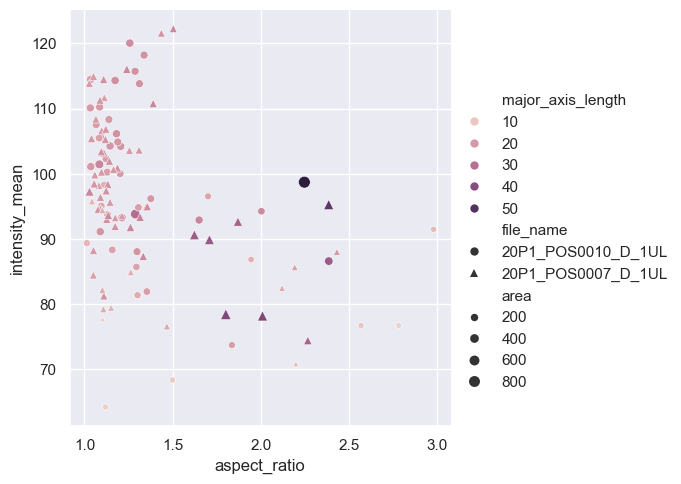

In [7]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean",
            size="area",
            hue="major_axis_length",          
            style="file_name",       # Grouping variable that will produce elements with different styles
            markers=["o", "^"]);     # Define which markers are to be used for the style variable

## Define subplots

Since our plot is now overcrowded, we should find another way to visualize from which image which data originates. Instead of representing the variable `file_name` as a marker type, we will pass this argument to the `col` parameter of `relplot`.

Seaborn then automatically divides the plot into two subplots, each representing one of the file names, and adds the corresponding title to each plot. This approach simplifies the visualization and makes it easier to interpret.

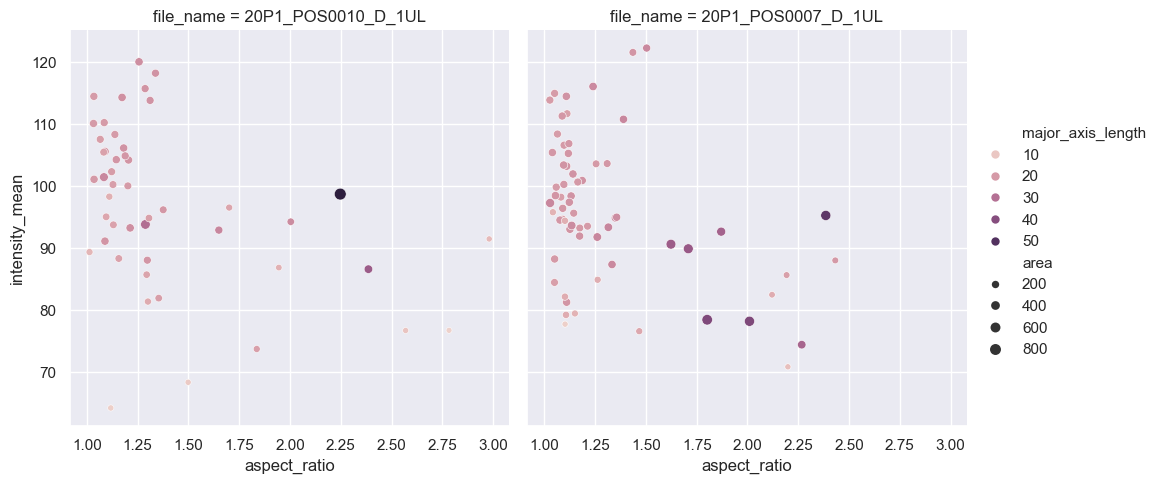

In [8]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean",
            size="area",
            hue="major_axis_length",
            col="file_name");          # Variable to define subsets to plot on different sublots

## Control the appearance of your plot

That's already quite neat, but a few things are missing. Let's say, we would like to reduce the height and make the plots wider. Also the dots should have more contrast. For this, we will provide further arguments to the `relplot`function.

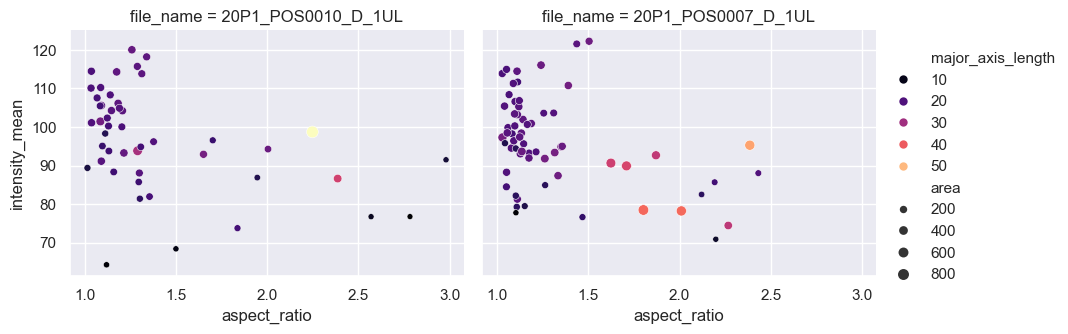

In [9]:
sns.relplot(data=df,
            x="aspect_ratio",
            y="intensity_mean",
            size="area",
            hue="major_axis_length",
            col="file_name",
            height=3.5,         # Set the height to 3.5 inches
            aspect=1.3,         # Set the width/height ratio to 1.3
            palette="magma");   # Change the default color palette to "magma"

Further, we want to change the labels of the x and y axes, and give a title to the whole graph. To accomplish this, we will have Seaborn return a FacetGrid object, which we will refer to as `g`. This object allows us to control the appearance and layout of the plot.

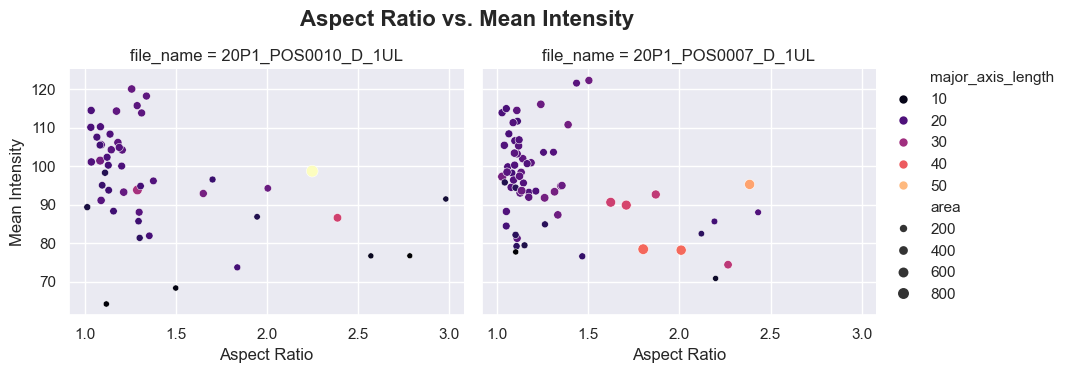

In [10]:
g = sns.relplot(data=df,                             # Return the plot as an object 'g'
                x="aspect_ratio",
                y="intensity_mean",
                size="area",
                hue="major_axis_length",
                col="file_name",
                height=3.5,
                aspect=1.3,
                palette="magma");


g.set_xlabels("Aspect Ratio")                        # Use 'g' to set the labels for the x axis
g.set_ylabels("Mean Intensity")                      # Use 'g' to set the labels for the y axis

g.fig.suptitle("Aspect Ratio vs. Mean Intensity",    # Add a title
               fontsize=16, fontweight="semibold",   # Set the font for the title
               x=0.45, y=1.06);                      # Give its position in relation to the figure coordinates

## Plotting a line regression model

With [`sns.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html), you can draw a scatter plot with a line regression model. Let's observe for instance the relationship between `major_axis_length` and `minor_axis_length` in each image.

*Note: Seaborn automatically adds a 0.95 confidence interval. The confidence level can be adjusted with the corresponding parameter.*

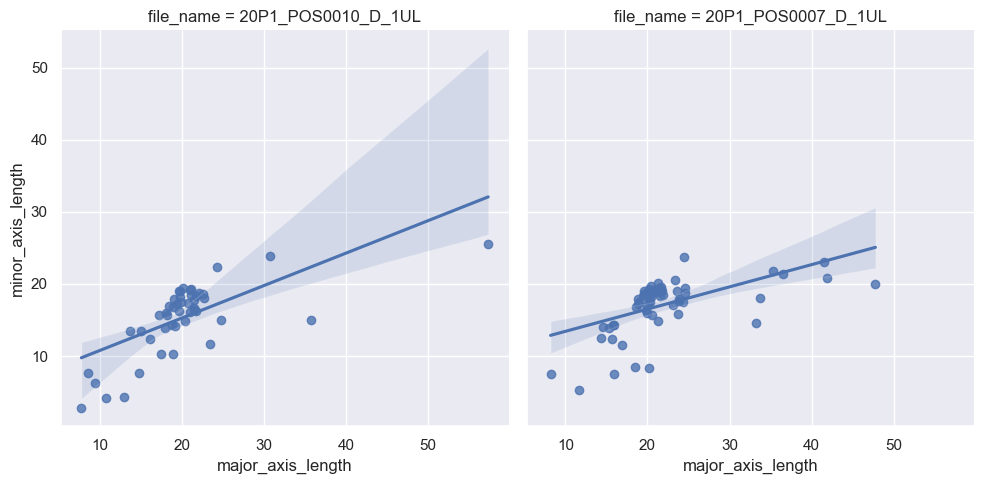

In [11]:
sns.lmplot(data=df,
           x="major_axis_length",
           y="minor_axis_length",
           col="file_name");

---

## Exercise 1

Plot the same line regression model as above, but on a single plot, with points and regression lines having two different colors according to `file_name`.

In [12]:
# Your code here


## Exercise 2
Until now, we have used the Seaborn default apperance. We want now to customize the theme of the plot above by changing:
- the background: change to a white background without a grid
- the font family: change to "serif"
- the color palette: change the two colors some red tone and some light green.

Reflect about why this color choice is a bad idea and what you should do instead.

Then, give your plot a title and position it properly.

Hints:
- Check the documentation of [`set_theme`](https://seaborn.pydata.org/generated/seaborn.set_theme.html) and customize the theme *before* plotting the data.
- Many colors can be called by their Matplotlib [name](https://matplotlib.org/stable/gallery/color/named_colors.html). You will need to pass the two colors as a Python list.

In [13]:
# Your code here
